# EDA Recommender system

In [66]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process # fuzzy string matching


In [67]:
# reading in the data and creating a path

path = "../Data/"
movies = "movies.csv"
ratings = "ratings.csv"

df_movies = pd.read_csv(path + movies)
df_ratings = pd.read_csv(path + ratings)



In [68]:
# Doing EDA on Movies data

print(df_movies.head()) # Contains columns movieId, title, genres
print(df_movies.shape) # 58098 rows and 3 columns
print(df_movies.info()) # No null values, title is an object, genres is an object
# checking for duplicates
print(df_movies.duplicated().sum()) # 0 duplicates


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
(58098, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB
None
0


In [69]:
# same for ratings data
print(df_ratings.head()) # Contains columns userId, movieId, rating, timestamp
print(df_ratings.shape) # 27753444 rows and 4 columns
print(df_ratings.info()) # No null values, userId is an int, movieId is an int, rating is a float, timestamp is an int
# checking for duplicates
print(df_ratings.duplicated().sum()) # 0 duplicates

   userId  movieId  rating   timestamp
0       1      307     3.5  1256677221
1       1      481     3.5  1256677456
2       1     1091     1.5  1256677471
3       1     1257     4.5  1256677460
4       1     1449     4.5  1256677264
(27753444, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB
None
0


In [70]:
# Merging the two dataframes
df = pd.merge(df_movies, df_ratings, on = "movieId")


In [71]:
# Converting timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit = "s")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,4.0,2005-04-17 19:25:37
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,5.0,2000-01-26 11:24:10
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,2015-09-13 18:36:15
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,4.0,2013-06-09 20:34:23
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,4.0,2009-03-21 08:03:51


In [72]:
# dropping movies with less than 10000 ratings
#df = df.groupby("title").filter(lambda x: len(x) >= 10000).reset_index(drop = True) # removes 13343761 entries
#df.head()

In [73]:
# finding the most negative user
df.groupby("userId").mean().sort_values("rating", ascending = True).head()

C:\Users\Agam\AppData\Local\Temp\ipykernel_18400\3529508978.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("userId").mean().sort_values("rating", ascending = True).head()


,movieId,rating
userId,,
246381,342.000000,0.5
117977,1304.950000,0.5
163134,2021.000000,0.5
61279,3593.000000,0.5
280246,4836.866667,0.5


In [74]:
# Checking how many users has a mean of 0.5 for rating
# amount of negative users
df.groupby("userId").mean().sort_values("rating", ascending = True).value_counts()
df.groupby("userId").mean().sort_values("rating", ascending = True).head()


C:\Users\Agam\AppData\Local\Temp\ipykernel_18400\137489171.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("userId").mean().sort_values("rating", ascending = True).value_counts()
C:\Users\Agam\AppData\Local\Temp\ipykernel_18400\137489171.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("userId").mean().sort_values("rating", ascending = True).head()


,movieId,rating
userId,,
246381,342.000000,0.5
117977,1304.950000,0.5
163134,2021.000000,0.5
61279,3593.000000,0.5
280246,4836.866667,0.5


In [75]:
# Checking how many users has a mean of 5 for rating
# amount of positive users
df.groupby("userId").mean().sort_values("rating", ascending = False).value_counts()
df.groupby("userId").mean().sort_values("rating", ascending = False).head()

C:\Users\Agam\AppData\Local\Temp\ipykernel_18400\53535331.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("userId").mean().sort_values("rating", ascending = False).value_counts()
C:\Users\Agam\AppData\Local\Temp\ipykernel_18400\53535331.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("userId").mean().sort_values("rating", ascending = False).head()


,movieId,rating
userId,,
128580,43841.80,5.0
21115,96488.00,5.0
157811,2858.00,5.0
56311,77622.75,5.0
276281,2594.50,5.0


### Not enough 

In [76]:
# Finding how many reviews every movie has

df.groupby("title").count().sort_values("rating", ascending = False).head(100)

,movieId,genres,userId,rating,timestamp
title,,,,,
"Shawshank Redemption, The (1994)",97999,97999,97999,97999,97999
Forrest Gump (1994),97040,97040,97040,97040,97040
Pulp Fiction (1994),92406,92406,92406,92406,92406
"Silence of the Lambs, The (1991)",87899,87899,87899,87899,87899
"Matrix, The (1999)",84545,84545,84545,84545,84545
...,...,...,...,...,...
L.A. Confidential (1997),32553,32553,32553,32553,32553
"Clockwork Orange, A (1971)",32436,32436,32436,32436,32436
Ghost (1990),32210,32210,32210,32210,32210


In [77]:
# Checking how many different users there are
df["userId"].nunique() # 283228

283228

### Ten most rated movies:

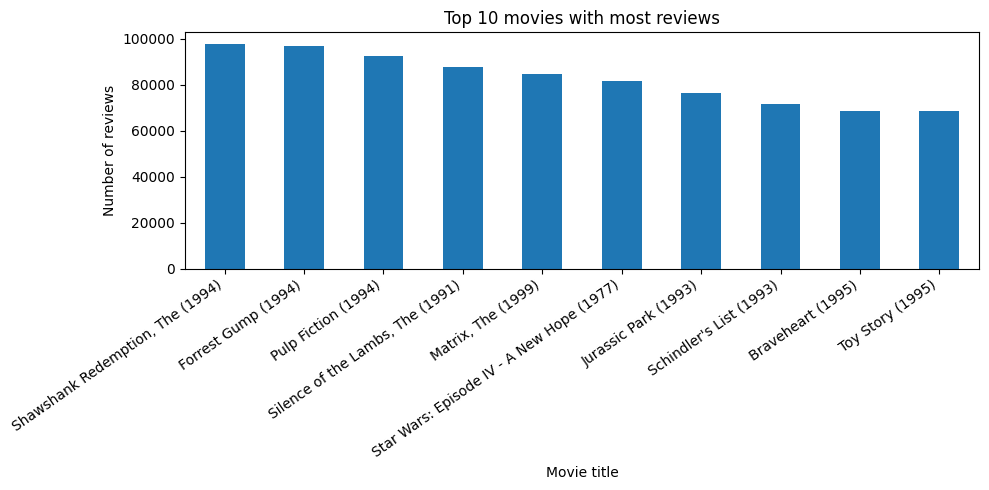

In [78]:
# What 10 movies have the most reviews
df_top_ten = df.groupby("title").count().sort_values("rating", ascending = False).head(10)
#Plotting the 10 movies with the most reviews
df_top_ten.plot(kind = "bar", y = "rating", legend = False, figsize = (10, 5))
plt.title("Top 10 movies with most reviews")
plt.xlabel("Movie title")
plt.ylabel("Number of reviews")
# skewing the x axis
plt.xticks(rotation = 35, ha = "right")
plt.tight_layout()
plt.show()

Shawshank Redemption, The (1994) 4.42
Forrest Gump (1994) 4.06
Pulp Fiction (1994) 4.17
Silence of the Lambs, The (1991) 4.15
Matrix, The (1999) 4.15
Star Wars: Episode IV - A New Hope (1977) 4.12
Jurassic Park (1993) 3.67
Schindler's List (1993) 4.26
Braveheart (1995) 4.01
Toy Story (1995) 3.89


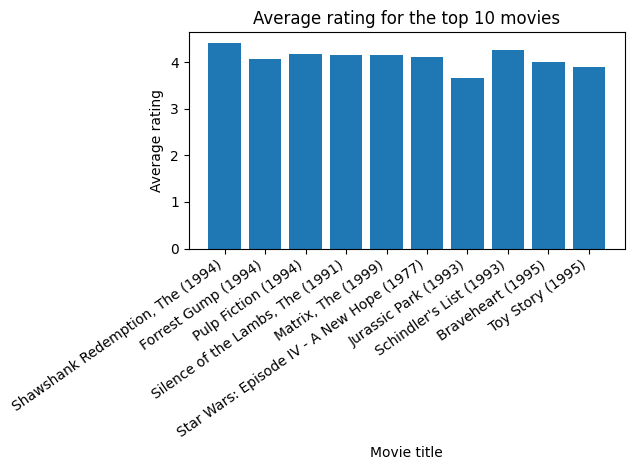

In [106]:
#creating list for movie titles and average rating
movie_title = []
movie_rating = []

# Checking the average rating for the top 10 movies
for movie in df_top_ten.index: # loops through the index of the top ten movies
    movie_title.append(movie) # appending the movie title to the list
    movie_rating.append(round(df[df["title"] == movie]["rating"].mean(), 2)) # appending the average rating
    print(movie, round(df[df["title"] == movie]["rating"].mean(), 2)) # rounding to 2 decimals
    

# Plotting the average rating for the top 10 movies
plt.bar(movie_title, movie_rating,)
plt.title("Average rating for the top 10 movies")
plt.xlabel("Movie title")
plt.ylabel("Average rating")
# skewing the x axis
plt.xticks(rotation = 35, ha = "right")
plt.tight_layout()


In [80]:
# Source: https://stackoverflow.com/questions/64323346/extracting-year-from-a-column-of-string-movie-names
# Daniel Nilsson also helped me with this code
# Adding a year column to the dataframe
df["year"] = df["title"].str.extract(r"\((\d{4})\)", expand=False) # extract year from title using regex
# expand False returns a series instead of a dataframe
df["year"] = pd.to_numeric(df["year"]) # convert year to numeric
df['year'] = df['year'].fillna(0).astype(int) # converts from float to int

In [81]:
# Creating a new dataframe with the amount of movies per year
df_year = df.groupby("year").count().sort_values("rating", ascending = False).head(100)
df_year = df_year.reset_index()

# finds all years between 1 and 2020 ()

df_year = df[(df['year'] > 1) & (df['year'] < 2022)] # removes all years before 1 and after 2020
df_year
df_year['year'].min(), df_year['year'].max() # 1874, 2018

(1874, 2018)

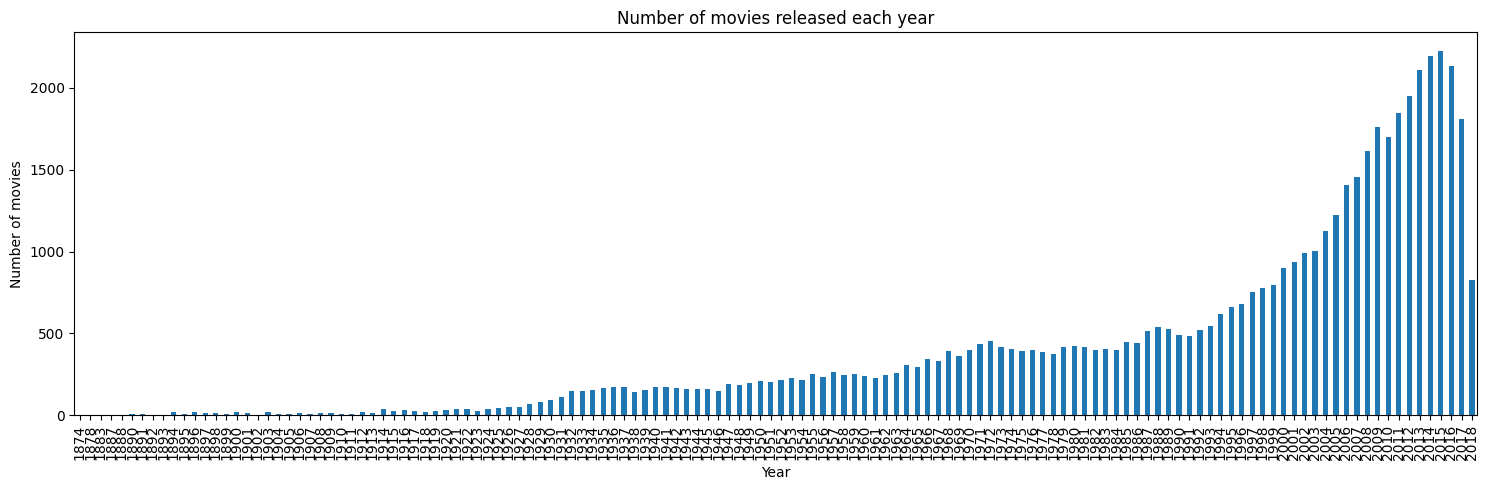

In [82]:


# plot the number of movies released each year

df_year.groupby('year')['title'].nunique().plot(kind='bar', figsize=(15, 5))
# set the title
plt.title('Number of movies released each year')
# set the x and y labels
plt.xlabel('Year')
plt.ylabel('Number of movies')
# skewing the x axis
plt.xticks(rotation = 90, ha = "center")
plt.tight_layout()


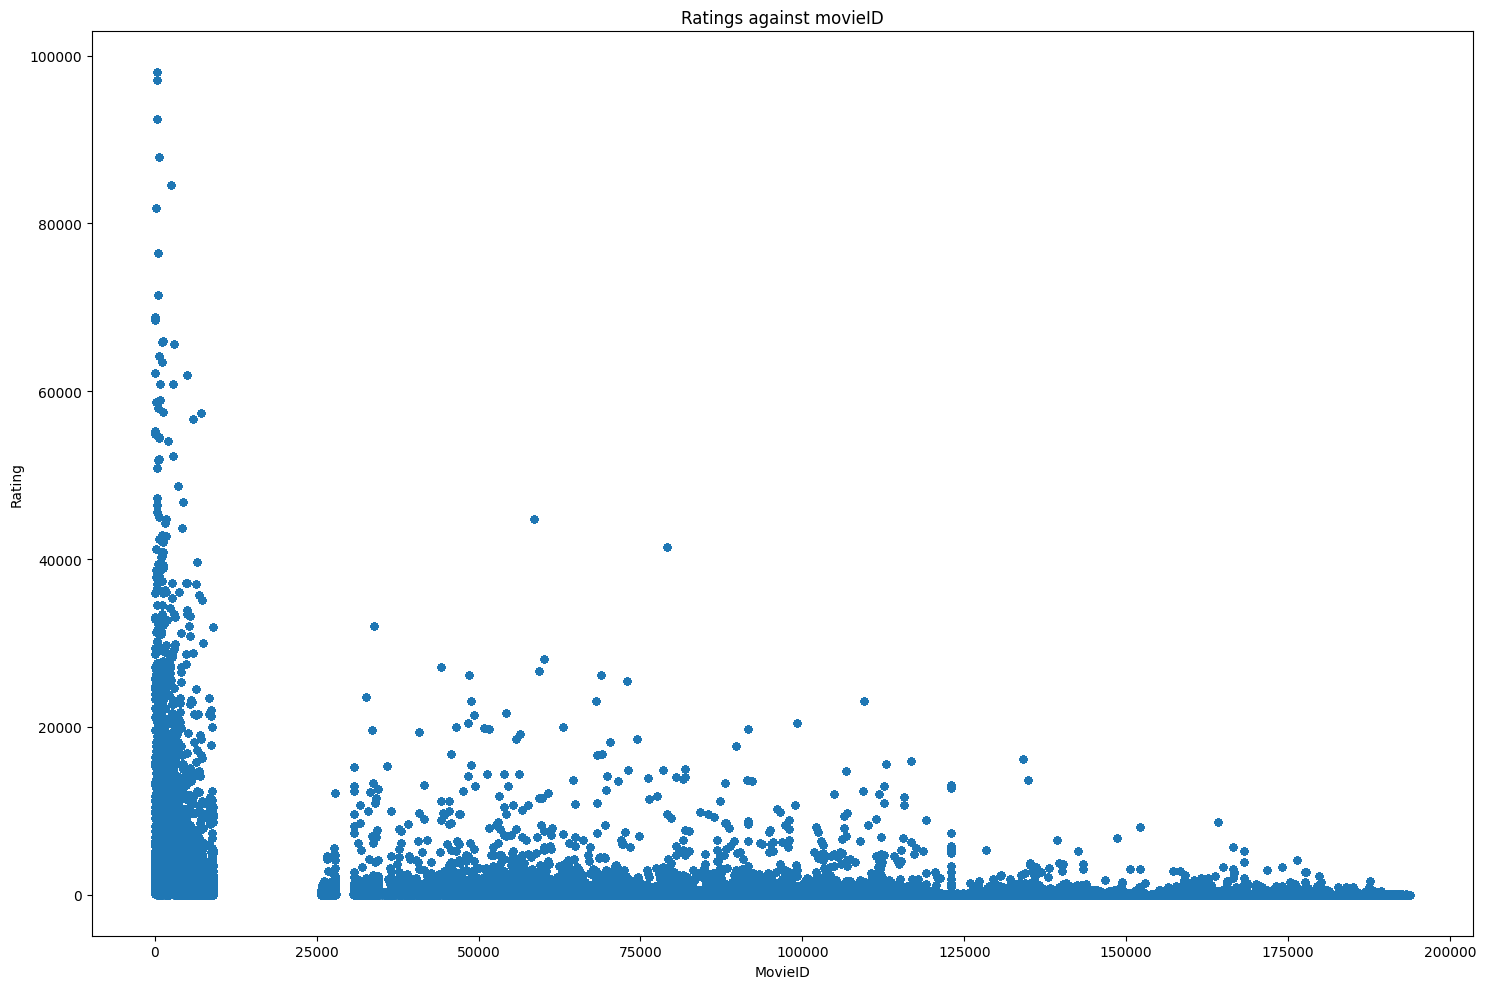

In [107]:
# Plotting ratings against movieID
# new column with total amount of ratings per movie
df["total_ratings"] = df.groupby("movieId")["rating"].transform("count")


df.plot(kind = "scatter", x = "movieId", y = "total_ratings", figsize = (15, 10))
plt.title("Ratings against movieID")
plt.xlabel("MovieID")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


# Creating Sparse Matrix

In [84]:
# printing shapes of ratings and movie df
print(df_ratings.shape)
print(df_movies.shape)
print(df.shape)

(27753444, 4)
(58098, 3)
(27753444, 8)


In [85]:
# Following code from Kevin.

from scipy.sparse import csr_matrix

# picking out columns to use
movies = pd.Categorical(df['movieId']) # creating a categorical variable
users = pd.Categorical(df['userId'])

# creating sparse matrix
mat_movies_users = csr_matrix((df_ratings['rating'], (movies.codes, users.codes))) # creating a sparse matrix
# movies.codes is the movieID, users.codes is the userID

mat_movies_users.shape

(53889, 283228)

In [86]:
from sklearn.neighbors import NearestNeighbors

# Creating the KNN model
knn_model = NearestNeighbors(metric = 'cosine', algorithm = 'brute') # using cosine similarity and brute force algorithm because of the size of the data

# fitting the model
knn_model.fit(mat_movies_users) # fitting the model to the sparse matrix




NearestNeighbors(algorithm='brute', metric='cosine')

In [117]:
# This code contains an index error.
def recommender(movie_name, data,model, n_recommendations): # n_recommendations neighbors
    model.fit(data)
    idx=process.extractOne(movie_name, df_movies['title'])[2] # finding the index of the movie [2] is because of the tuple
    # process.extractOne returns a tuple with the movie name, the score and the index

    print('Movie Selected: ',df_movies['title'][idx], 'Index: ',idx) # printing the movie name and index
    print('Generating recommendations for ',movie_name,':')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations+1) # finding the distances and indices of the neighbors
    # n_neighbors is the amount of neighbors + 1 because the first neighbor is the movie itself
    for i in indices[0][1:]: # [1:] skips the movie that the user wrote in  # Code help from Daniel
        print(df_movies['title'][i]) # finds movie index in df_movies and prints the title
    
recommender('Star Wars', mat_movies_users, knn_model,5)




Movie Selected:  Star Wars: Episode IV - A New Hope (1977) Index:  257
Generating recommendations for  Star Wars :
Star Wars: Episode V - The Empire Strikes Back (1980)
Star Wars: Episode VI - Return of the Jedi (1983)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Matrix, The (1999)
Indiana Jones and the Last Crusade (1989)
